
"""
# **Netflix Originals Data Analysis Report**

## **Introduction**
This report analyzes the Netflix Originals dataset, exploring relationships between movie attributes such as genre, IMDB scores, and runtime.

### **Objectives:**
- Clean and preprocess the dataset
- Perform univariate, bivariate, and multivariate analysis
- Identify trends and patterns in Netflix original movies
"""

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv("NetflixOriginals.csv", encoding="latin-1")

In [51]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


"""
## **Data Cleaning**
- Handling missing values
- Removing duplicates
- Standardizing column names
"""

In [52]:
# Handling Missing Values
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna("Unknown", inplace=True)

In [53]:
# Removing Duplicates
df.drop_duplicates(inplace=True)

Handling the missing values

In [54]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


"""
## **Exploratory Data Analysis (EDA)**
### **Univariate Analysis**
- Summary statistics
- KDE plots, histograms, and box plots
"""

In [55]:
print("Summary Statistics:")
display(df.describe())

Summary Statistics:


,runtime,imdb_score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [56]:
df.head()

,title,genre,premiere,runtime,imdb_score,language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


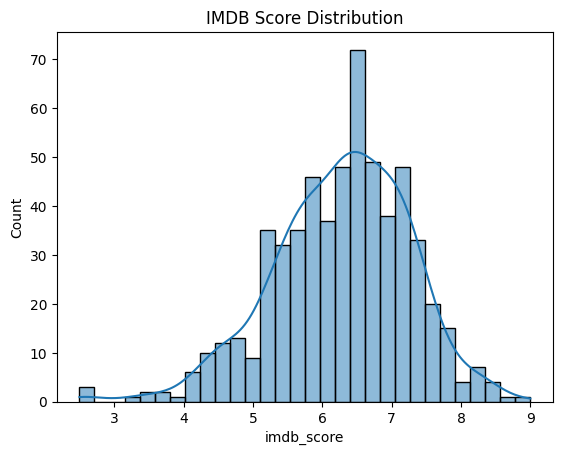

In [57]:
# Histograms
sns.histplot(df['imdb_score'].dropna(), kde=True, bins=30)
plt.title("IMDB Score Distribution")
plt.show()

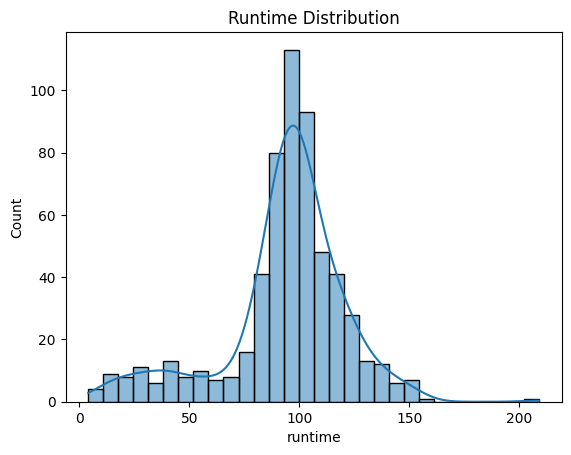

In [58]:
sns.histplot(df['runtime'].dropna(), kde=True, bins=30)
plt.title("Runtime Distribution")
plt.show()

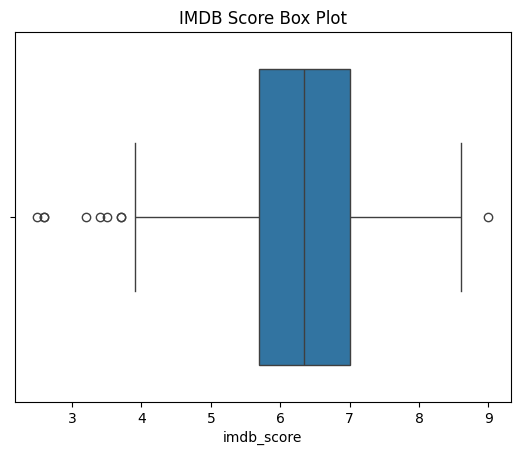

In [59]:
# Box Plots
sns.boxplot(x=df['imdb_score'])
plt.title("IMDB Score Box Plot")
plt.show()

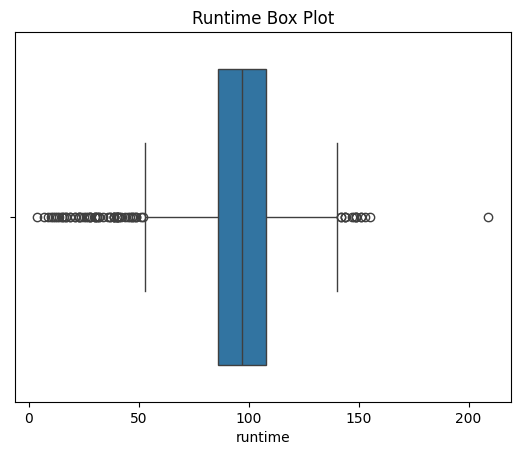

In [60]:
sns.boxplot(x=df['runtime'])
plt.title("Runtime Box Plot")
plt.show()

"""
### **Bivariate Analysis**
- Correlation Matrix
- Box Plots by Genre
"""

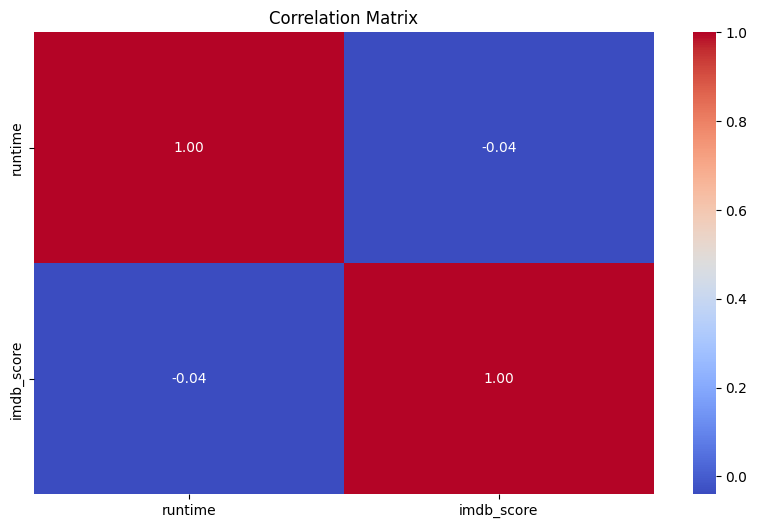

In [61]:
plt.figure(figsize=(10, 6))

# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr().round(2), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

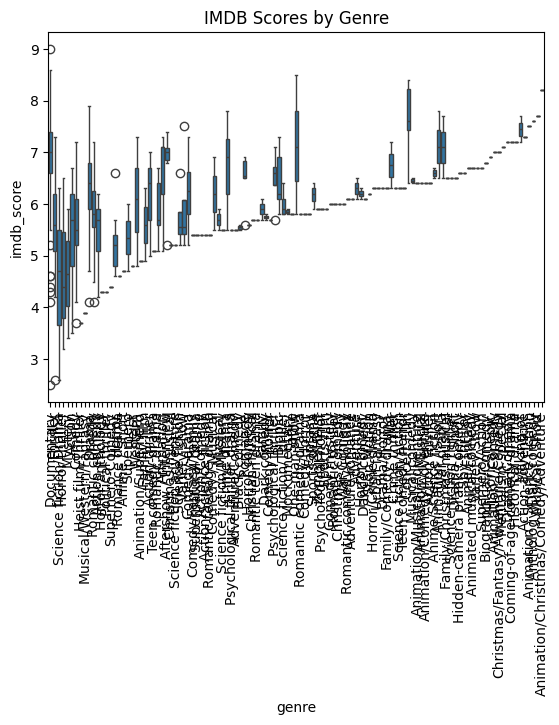

In [62]:
sns.boxplot(x='genre', y='imdb_score', data=df)
plt.xticks(rotation=90)
plt.title("IMDB Scores by Genre")
plt.show()

"""
### **Multivariate Analysis**
- Pair plots for numerical variables
- Heatmap for genre vs. language distribution
"""

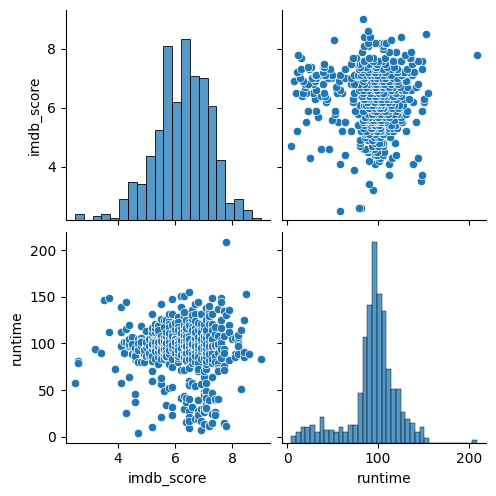

In [63]:
sns.pairplot(df[['imdb_score', 'runtime']].dropna())
plt.show()

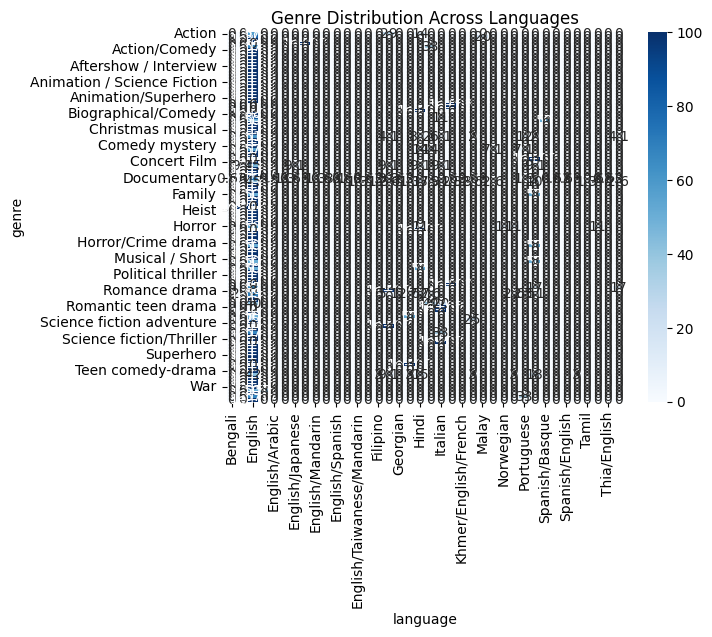

In [64]:

sns.heatmap(pd.crosstab(df['genre'], df['language'], normalize='index') * 100, annot=True, cmap='Blues')
plt.title("Genre Distribution Across Languages")
plt.show()

"""
## **Conclusion**
- Some genres tend to have higher IMDb scores than others.
- Runtime and IMDb scores show specific trends.
- Multilingual movies may have unique rating characteristics.
"""

In [65]:
# Save Cleaned Data
df.to_csv("cleaned_netflix_data.csv", index=False)

print("Data analysis complete! Cleaned dataset saved as 'cleaned_netflix_data.csv'.")


Data analysis complete! Cleaned dataset saved as 'cleaned_netflix_data.csv'.
